In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
companyDataset = pd.read_csv("./1000_Companies.csv")
companyDataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
predictors = companyDataset.iloc[:,:-1].values
predictions = companyDataset.iloc[:,-1].values
predictors

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

.corr() function gives the correlation matrix which shows the correlation coefficients between each variable in x with each variable in y

In [4]:
companyDataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


label encoder is responsible for converting lables like new york ,florida,... to numbers like 1,2,...

In [5]:
LabelEncoderObject = LabelEncoder()
predictors[:,3] = LabelEncoderObject.fit_transform(predictors[:,3])
predictors[:,3]

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0,
       1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2,
       0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0,
       1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1,
       2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1,

columntransformer transforms the columns as suggested by parameters<br>
onehotencoder is used after label encoder<br>
when we use label encoder categories like 1,2,3 are created. numbers like these may create issues with calculation later on in our model. So onehotencoder converts those labels in for 1,0,0; 0,1,0; 0,0,1;...<br>

The argument passed to the ColumnTransformer constructor is a list of tuples, where each tuple specifies a transformation to be applied to a subset of the columns in the input data. In this case, there is only one tuple in the list, which specifies that the "OneHotEncoder" should be applied to the third column (index 3) of the data.<br>
The "remainder" argument is set to "passthrough", which means that any columns in the input data that are not specified in the list of transformers will be passed through unchanged.

In [6]:
ColumnTransformerObject = ColumnTransformer([('encoder',OneHotEncoder(),[3])],remainder="passthrough")
predictors = np.array(ColumnTransformerObject.fit_transform(predictors))
predictors

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In this line of code, 'encoder' is a string that serves as an identifier or name for the particular transformation that is being applied to the data. The purpose of the name is to provide a label that can be used to refer to this transformation later on. It is not a reserved keyword or a predefined object, but rather a string that is chosen by the user for clarity and readability

In [7]:
x_train, x_test, y_train, y_test = train_test_split(predictors,predictions,test_size=0.1,random_state=0)

In [8]:
regModel = LinearRegression()
regModel.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred = regModel.predict(x_test)
y_pred

array([ 89194.99667418,  87823.67967544,  94328.15787711, 176093.28856512,
        83717.97906738, 111032.99029016, 131051.13937754,  90887.35193456,
       165366.13847477,  52937.11695614,  66224.35901906, 150835.68429017,
       126531.2365456 ,  58568.63046136, 177418.40075053,  75576.37809284,
       118333.14248729, 164405.12934979, 178074.70752517, 182937.80903866,
       128256.85771107,  85050.84064398, 181435.29732643,  83517.27846544,
       104496.96074809, 100703.18512278,  58204.42460602,  57036.41458141,
        68181.65725089, 212307.52597913, 120878.14790007, 111254.29970559,
       101897.20600902, 138156.39628353,  63227.13822983, 108370.99578714,
       186905.91173428, 171830.90055259, 175050.77694079, 117753.20219946,
        97113.56229413, 165287.9847558 , 107230.96450503,  49891.56785441,
       116589.00681992,  57859.23931951, 158730.4655596 ,  78400.11669935,
       160049.13912034, 131296.35954309, 185345.57867852, 175015.39375552,
        93172.59251848,  

<function matplotlib.pyplot.show(close=None, block=None)>

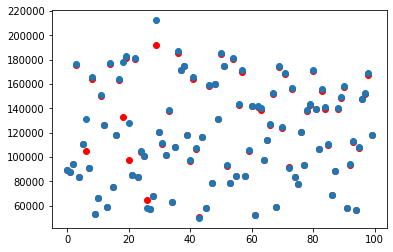

In [14]:
x1points = np.array(range(len(x_test)))
y1points = np.array(y_pred)
y2points = np.array(y_test)

plt.scatter(x1points,y2points, color="r")
plt.scatter(x1points,y1points)
plt.show

In [17]:
r2_score(y_test,y_pred)

0.9722951901010638